### Version 0: Simple MLP ( Initial Dataset without SMOTETomek )

1 hidden layer with 100 neurons


Epoch 0: Train Loss: 4.9895, Val Loss: 4.9935
Epoch 100: Train Loss: 1.7951, Val Loss: 2.6000
Epoch 200: Train Loss: 1.2564, Val Loss: 2.4058
Epoch 300: Train Loss: 0.9567, Val Loss: 2.3729
Epoch 400: Train Loss: 0.7578, Val Loss: 2.4028
Training Time: 57.69 seconds


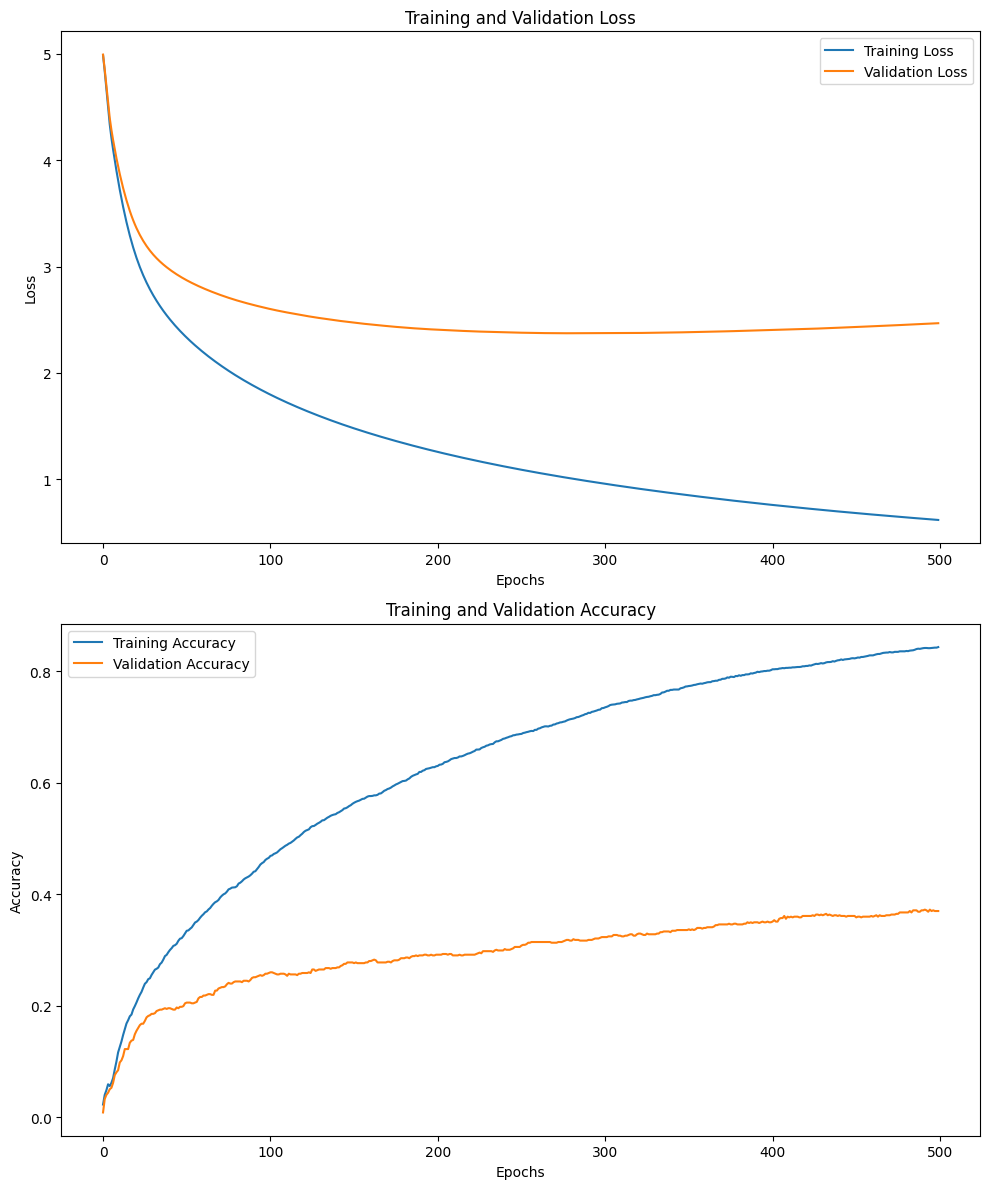

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


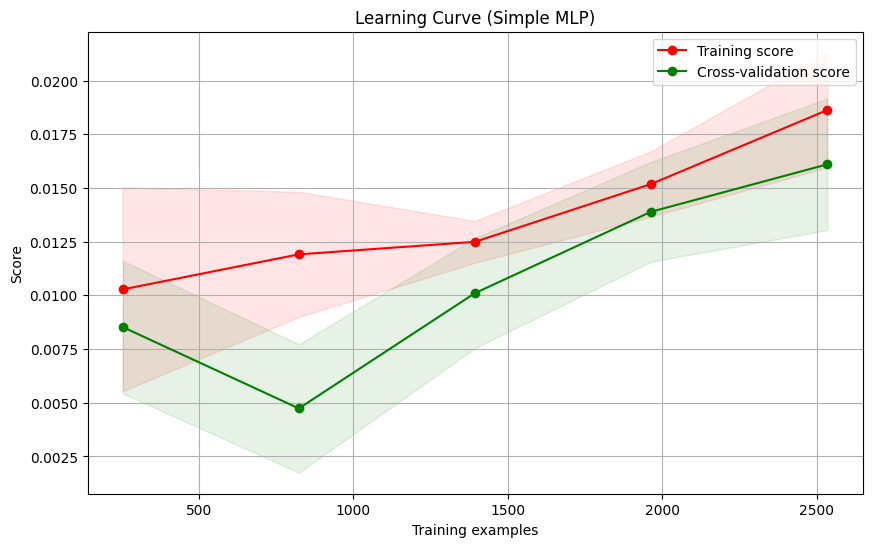

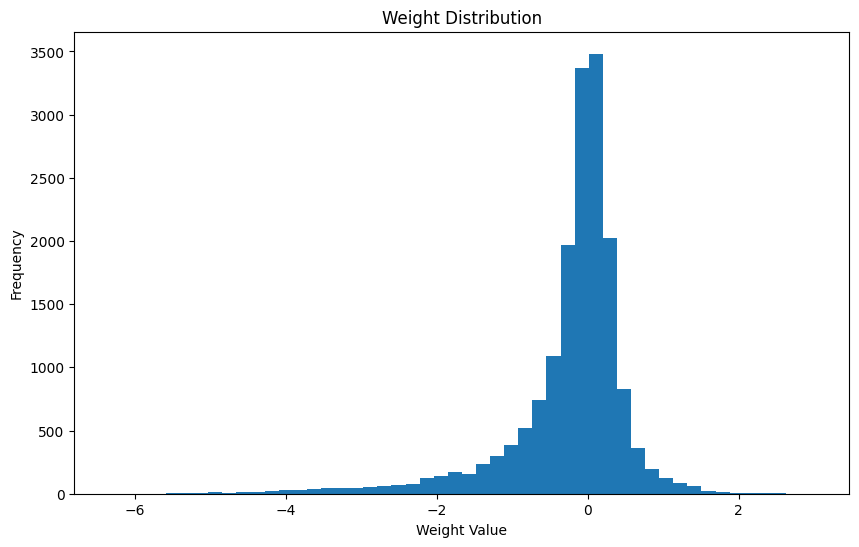

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reache

Cross-validation scores: [0.3044164  0.32018927 0.32334385 0.34597156 0.28593997]
Mean CV score: 0.3160 (+/- 0.0401)
Test Accuracy: 0.3859
F1-score: 0.3751
Precision: 0.4013
Recall: 0.3859

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.67      1.00      0.80         6
         Active       0.00      0.00      0.00         6
          Adult       0.67      1.00      0.80         2
          Agile       0.67      0.86      0.75         7
       Alluring       0.69      1.00      0.81        11
        Amiable       0.25      0.40      0.31         5
        Amusing       0.50      0.33      0.40         6
   Aristocratic       0.75      0.75      0.75         4
       Aromatic       1.00      0.60      0.75         5
       Artistic       0.00      0.00      0.00         1
  Authoritative       0.00      0.00      0.00         4
         Bitter       1.00      0.75      0.86         4
        Bitterl       1.00      1.00      1.0

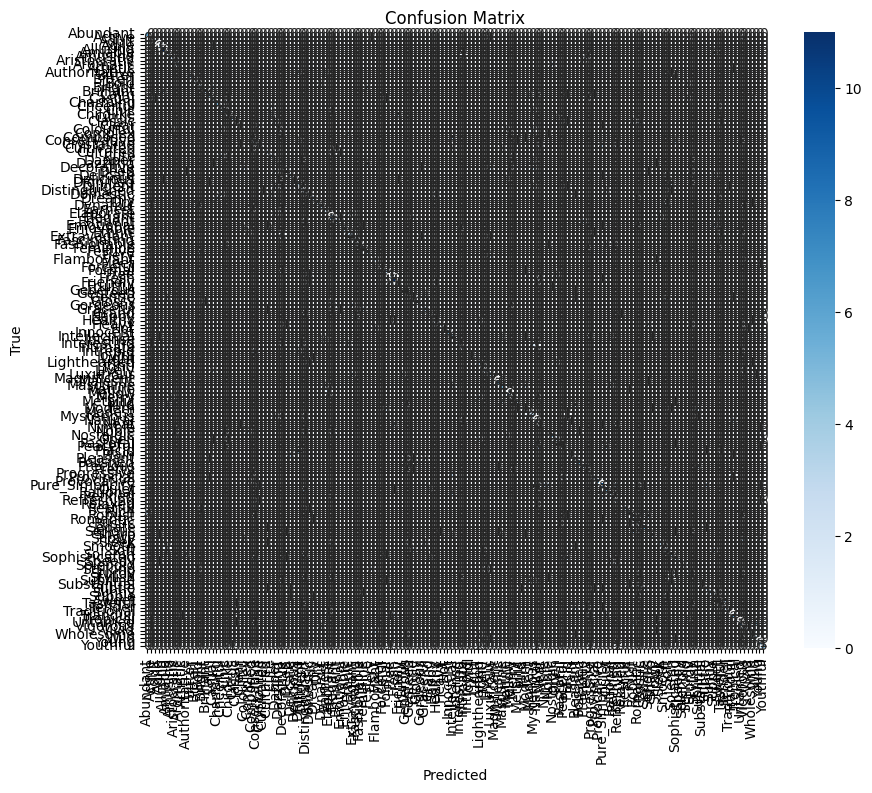

Number of parameters: 17261

Model Fit Analysis:
Train Accuracy: 0.8431
Validation Accuracy: 0.3699
Test Accuracy: 0.3859
Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.

Difference between Train and Validation accuracy: 0.4732
Difference between Train and Test accuracy: 0.4573
Difference between Validation and Test accuracy: 0.0159


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


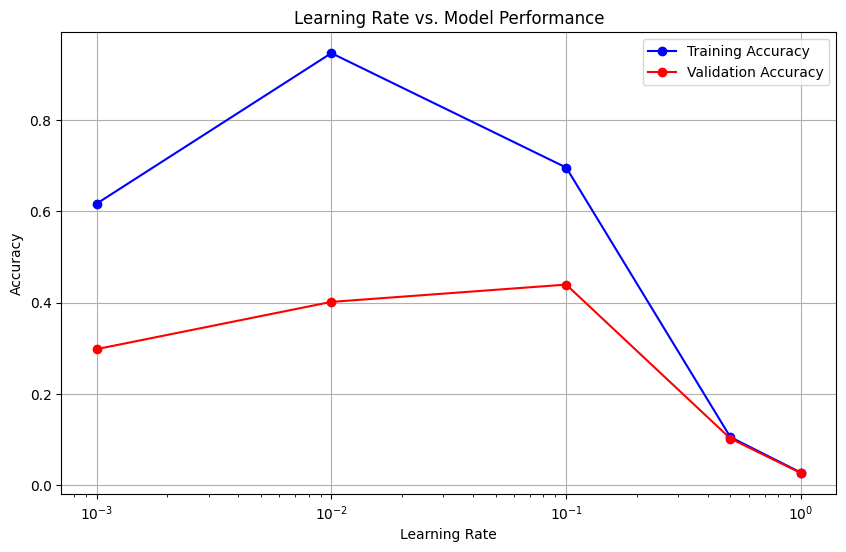

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

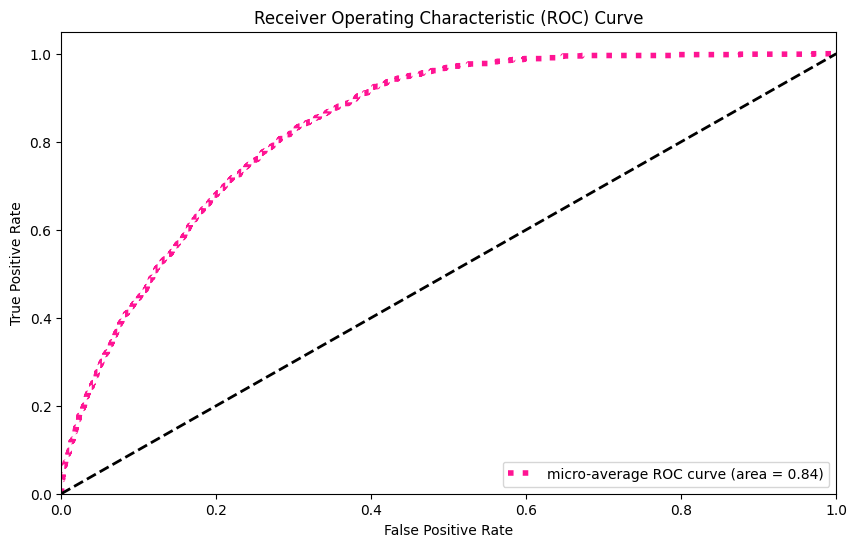

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, log_loss, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load and preprocess data
data = pd.read_csv(r'C:\Biography\ArtEmotionalPalette-AI\PartA-model\datasets\x6perfect_cleaned_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Encode labels (convert text labels to numbers)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train(64%), validation (16%), and test (20%) sets.
# Stratify ensures proportional representation of classes in each split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Standardize features to have zero mean and unit variance, which is important for neural networks.
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, n_epochs=1000):
    # Initialize lists to store performance metrics
    start_time = time.time()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    # Train the model epoch by epoch 
    for epoch in range(n_epochs):
        # Partial fit is used to train the model incrementally
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Calculate and store losses and accuracies
        train_pred = model.predict_proba(X_train) 
        val_pred = model.predict_proba(X_val)
        
        train_loss = log_loss(y_train, train_pred) 
        val_loss = log_loss(y_val, val_pred)
        
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        
        train_losses.append(train_loss) 
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    training_time = time.time() - start_time
    return model, train_losses, val_losses, train_accuracies, val_accuracies, training_time

# Function : show how the loss & accuracy changes over epochs for both training and validation sets.
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    # Create subplots for loss and accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot loss curves
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    
    # Plot accuracy curves
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Function: shows how model performance changes with increasing training set size.
def plot_learning_curve(model, X, y, title):
    # Calculate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=-1)
    
    # Calculate mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Function to plot weight distribution
def plot_weight_distribution(model):
    plt.figure(figsize=(10, 6))
    weights = np.concatenate([layer.flatten() for layer in model.coefs_])
    plt.hist(weights, bins=50)
    plt.title('Weight Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot confusion matrix which displays a heatmap of true vs. predicted labels.
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function : Shows how different learning rates affect model performance
def plot_learning_rate_performance(X_train, y_train, X_val, y_val):
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
    train_scores, val_scores = [], []
    
    # Train the model with different learning rates and store performance
    for lr in learning_rates:
        model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=lr, max_iter=200, random_state=42)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        val_scores.append(model.score(X_val, y_val))
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(learning_rates, train_scores, 'b-o', label='Training Accuracy')
    plt.semilogx(learning_rates, val_scores, 'r-o', label='Validation Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Learning Rate vs. Model Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, X, y):
    n_classes = len(np.unique(y))
    y_bin = np.eye(n_classes)[y]
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Create the model with 1 hidden layer and 100 neurons , 1 epoch at a time , warm_start=True means model will continue training from where it left off.
simple_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)
# Train the model for 500 epochs
simple_model, train_losses, val_losses, train_accuracies, val_accuracies, training_time = train_and_evaluate(
    simple_model, X_train_scaled, y_train, X_val_scaled, y_val, n_epochs=500)

print(f"Training Time: {training_time:.2f} seconds")

# Plot training curves
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

# Plot learning curve
plot_learning_curve(simple_model, X_train_scaled, y_train, "Learning Curve (Simple MLP)")

# Plot weight distribution
plot_weight_distribution(simple_model)

# Performs Cross-validation to evaluate model performance on different subsets of the data. 
cv_scores = cross_val_score(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), 
                            X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Evaluate on test set
test_accuracy = simple_model.score(X_test_scaled, y_test)
y_pred = simple_model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, le.classes_)

# Model complexity
n_params = sum(p.size for p in simple_model.coefs_) + sum(p.size for p in simple_model.intercepts_)
print(f"Number of parameters: {n_params}")

# Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracies[-1] > val_accuracies[-1] + 0.05 and train_accuracies[-1] > test_accuracy + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.")
elif train_accuracies[-1] < val_accuracies[-1] - 0.05 and train_accuracies[-1] < test_accuracy - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than validation and test accuracies.")
else:
    print("Model fit seems reasonable: Training, validation, and test accuracies are close.")

# Additional overfitting/underfitting check
train_val_diff = abs(train_accuracies[-1] - val_accuracies[-1])
train_test_diff = abs(train_accuracies[-1] - test_accuracy)
val_test_diff = abs(val_accuracies[-1] - test_accuracy)

print(f"\nDifference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")
print(f"Difference between Validation and Test accuracy: {val_test_diff:.4f}")

if train_val_diff > 0.1 or train_test_diff > 0.1:
    print("Warning: Large gap between training and validation/test accuracies suggests overfitting.")
elif train_accuracies[-1] < 0.8 * max(val_accuracies[-1], test_accuracy):
    print("Warning: Training accuracy much lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

# Plot learning rate performance
plot_learning_rate_performance(X_train_scaled, y_train, X_val_scaled, y_val)

# Plot ROC curve
plot_roc_curve(simple_model, X_test_scaled, y_test)

### Version 1: Simple MLP with a single hidden layer (100 neurons)


Epoch 0: Train Loss: 4.6208, Val Loss: 4.6345
Epoch 100: Train Loss: 0.7659, Val Loss: 0.9929
Epoch 200: Train Loss: 0.4478, Val Loss: 0.7204
Epoch 300: Train Loss: 0.3075, Val Loss: 0.6049
Epoch 400: Train Loss: 0.2255, Val Loss: 0.5443
Training Time: 147.57 seconds


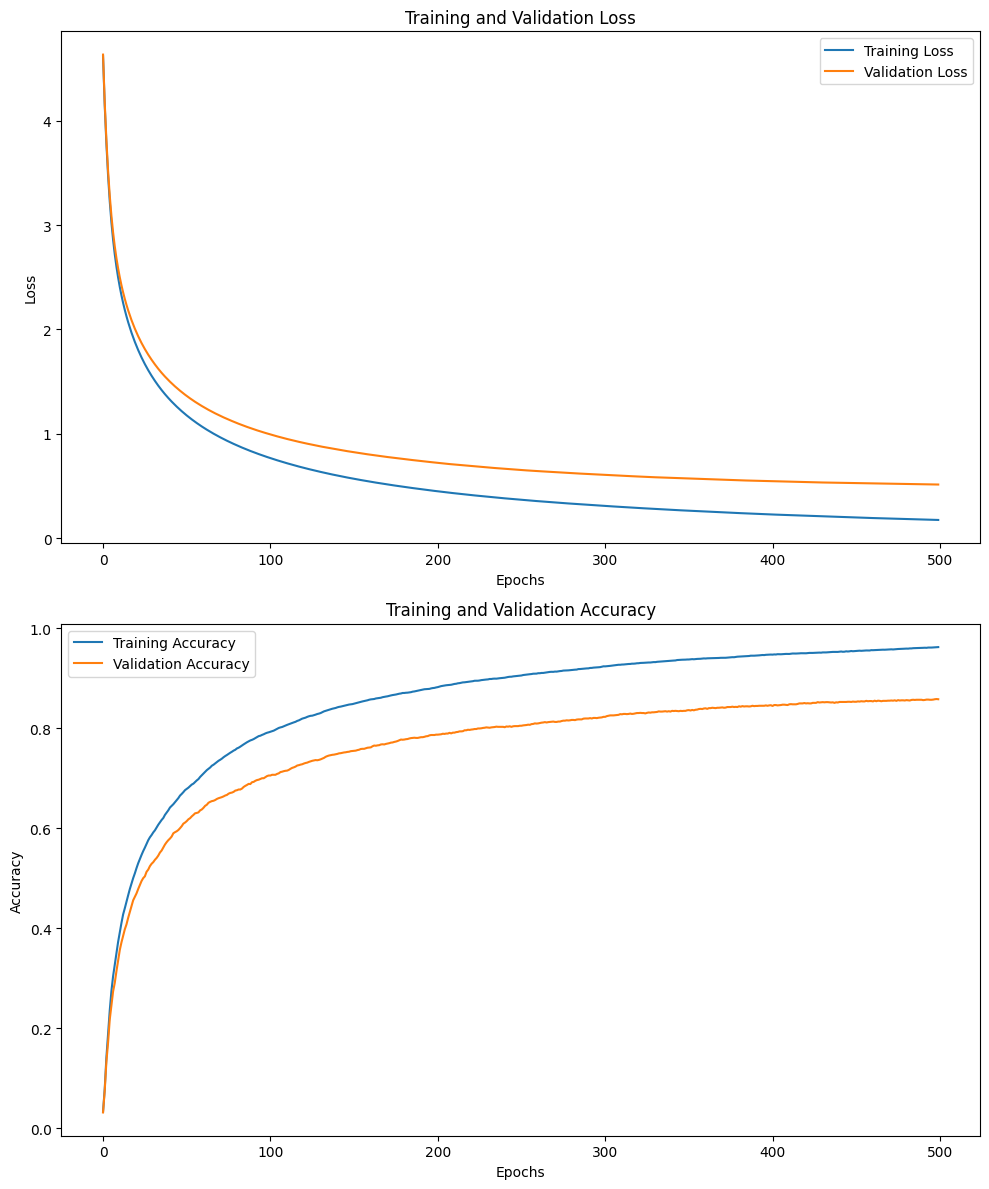

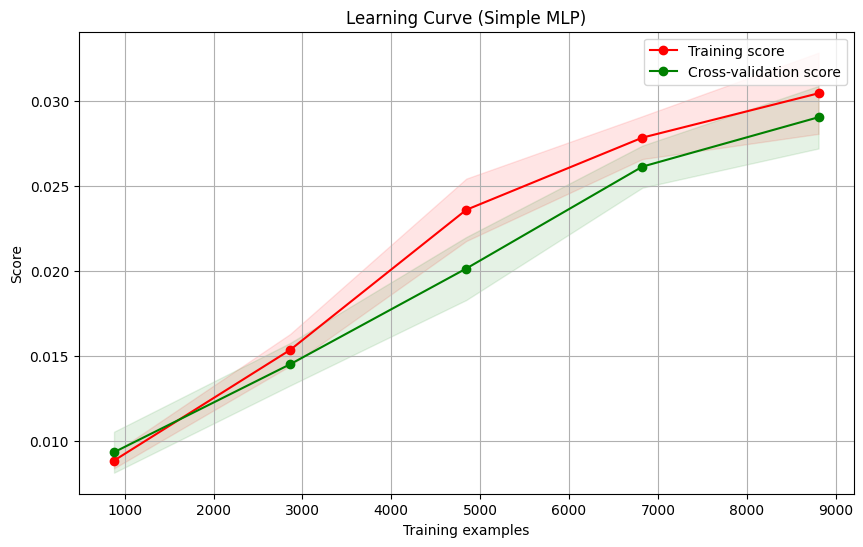

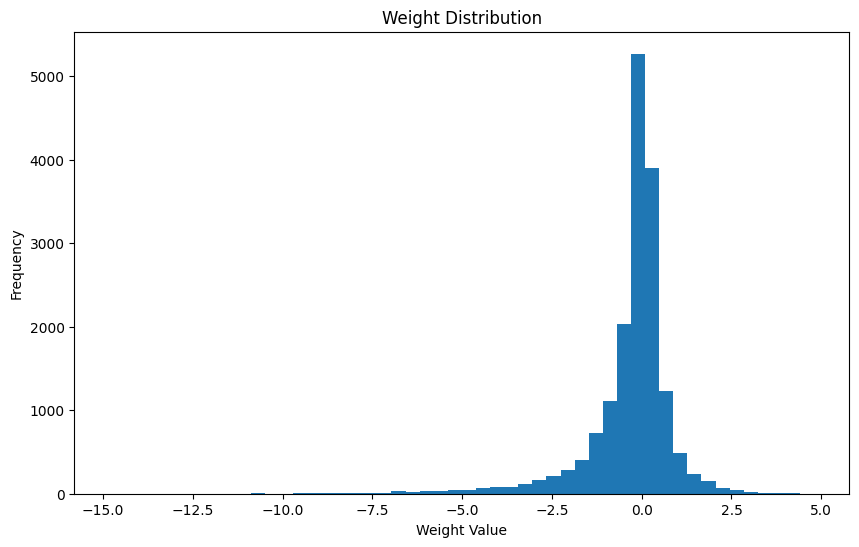

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Opti

Cross-validation scores: [0.80608538 0.80790191 0.82243415 0.82152589 0.81289737]
Mean CV score: 0.8142 (+/- 0.0135)
Test Accuracy: 0.8620
F1-score: 0.8597
Precision: 0.8670
Recall: 0.8620

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.95      0.95      0.95        21
         Active       0.57      0.76      0.65        21
          Adult       0.95      1.00      0.98        21
          Agile       1.00      0.77      0.87        22
       Alluring       0.82      0.86      0.84        21
        Amiable       0.86      0.90      0.88        21
        Amusing       0.91      1.00      0.95        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       0.96      1.00      0.98        22
       Artistic       0.96      1.00      0.98        22
  Authoritative       0.91      1.00      0.95        21
         Bitter       0.95      0.91      0.93        22
        Bitterl       1.00      1.00      1.0

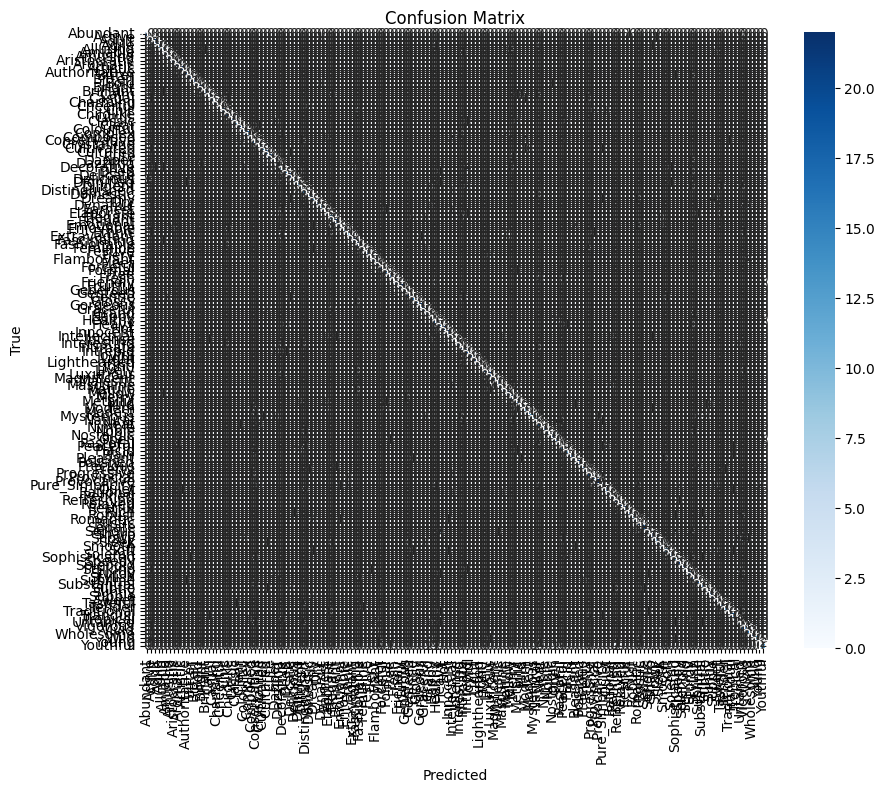

Number of parameters: 17261

Model Fit Analysis:
Train Accuracy: 0.9619
Validation Accuracy: 0.8576
Test Accuracy: 0.8620
Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.

Difference between Train and Validation accuracy: 0.1042
Difference between Train and Test accuracy: 0.0999
Difference between Validation and Test accuracy: 0.0043


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


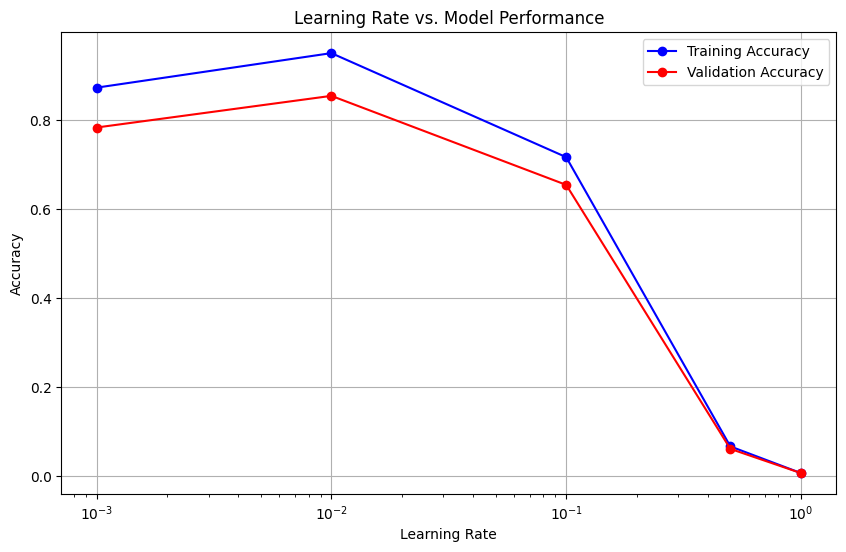

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: M

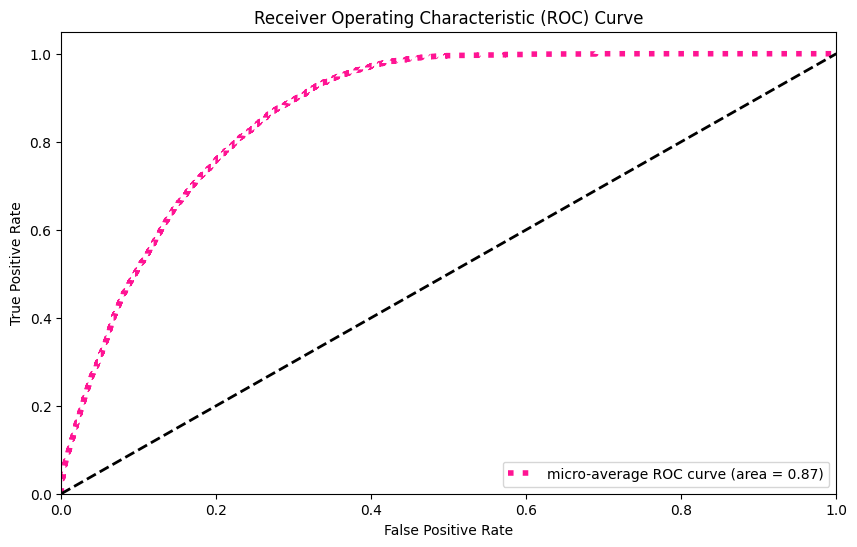

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, log_loss, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# Encode labels (convert text labels to numbers)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train(64%), validation (16%), and test (20%) sets.
# Stratify ensures proportional representation of classes in each split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Standardize features to have zero mean and unit variance, which is important for neural networks.
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_val, y_val, n_epochs=1000):
    # Initialize lists to store performance metrics
    start_time = time.time()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    # Train the model epoch by epoch
    for epoch in range(n_epochs):
        # Partial fit is used to train the model incrementally
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        # Calculate and store losses and accuracies
        train_pred = model.predict_proba(X_train) 
        val_pred = model.predict_proba(X_val)
        
        train_loss = log_loss(y_train, train_pred) 
        val_loss = log_loss(y_val, val_pred)
        
        train_acc = accuracy_score(y_train, model.predict(X_train))
        val_acc = accuracy_score(y_val, model.predict(X_val))
        
        train_losses.append(train_loss) 
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    
    training_time = time.time() - start_time
    return model, train_losses, val_losses, train_accuracies, val_accuracies, training_time

# Function : show how the loss & accuracy changes over epochs for both training and validation sets.
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    # Create subplots for loss and accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot loss curves
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    
    # Plot accuracy curves
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Function: shows how model performance changes with increasing training set size.
def plot_learning_curve(model, X, y, title):
    # Calculate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=-1)
    
    # Calculate mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Function to plot weight distribution
def plot_weight_distribution(model):
    plt.figure(figsize=(10, 6))
    weights = np.concatenate([layer.flatten() for layer in model.coefs_])
    plt.hist(weights, bins=50)
    plt.title('Weight Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot confusion matrix which displays a heatmap of true vs. predicted labels.
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function : Shows how different learning rates affect model performance
def plot_learning_rate_performance(X_train, y_train, X_val, y_val):
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
    train_scores, val_scores = [], []
    
    # Train the model with different learning rates and store performance
    for lr in learning_rates:
        model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=lr, max_iter=200, random_state=42)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        val_scores.append(model.score(X_val, y_val))
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(learning_rates, train_scores, 'b-o', label='Training Accuracy')
    plt.semilogx(learning_rates, val_scores, 'r-o', label='Validation Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Learning Rate vs. Model Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, X, y):
    n_classes = len(np.unique(y))
    y_bin = np.eye(n_classes)[y]
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train_scaled, y_train).predict_proba(X)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Create the model with 1 hidden layer and 100 neurons , 1 epoch at a time , warm_start=True means model will continue training from where it left off.
simple_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)
# Train the model for 500 epochs
simple_model, train_losses, val_losses, train_accuracies, val_accuracies, training_time = train_and_evaluate(
    simple_model, X_train_scaled, y_train, X_val_scaled, y_val, n_epochs=500)

print(f"Training Time: {training_time:.2f} seconds")

# Plot training curves
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

# Plot learning curve
plot_learning_curve(simple_model, X_train_scaled, y_train, "Learning Curve (Simple MLP)")

# Plot weight distribution
plot_weight_distribution(simple_model)

# Performs Cross-validation to evaluate model performance on different subsets of the data. 
cv_scores = cross_val_score(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), 
                            X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Evaluate on test set
test_accuracy = simple_model.score(X_test_scaled, y_test)
y_pred = simple_model.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, le.classes_)

# Model complexity
n_params = sum(p.size for p in simple_model.coefs_) + sum(p.size for p in simple_model.intercepts_)
print(f"Number of parameters: {n_params}")

# Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Train Accuracy: {train_accuracies[-1]:.4f}")
print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracies[-1] > val_accuracies[-1] + 0.05 and train_accuracies[-1] > test_accuracy + 0.05:
    print("Model may be overfitting: Training accuracy is significantly higher than validation and test accuracies.")
elif train_accuracies[-1] < val_accuracies[-1] - 0.05 and train_accuracies[-1] < test_accuracy - 0.05:
    print("Model may be underfitting: Training accuracy is significantly lower than validation and test accuracies.")
else:
    print("Model fit seems reasonable: Training, validation, and test accuracies are close.")

# Additional overfitting/underfitting check
train_val_diff = abs(train_accuracies[-1] - val_accuracies[-1])
train_test_diff = abs(train_accuracies[-1] - test_accuracy)
val_test_diff = abs(val_accuracies[-1] - test_accuracy)

print(f"\nDifference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")
print(f"Difference between Validation and Test accuracy: {val_test_diff:.4f}")

if train_val_diff > 0.1 or train_test_diff > 0.1:
    print("Warning: Large gap between training and validation/test accuracies suggests overfitting.")
elif train_accuracies[-1] < 0.8 * max(val_accuracies[-1], test_accuracy):
    print("Warning: Training accuracy much lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

# Plot learning rate performance
plot_learning_rate_performance(X_train_scaled, y_train, X_val_scaled, y_val)

# Plot ROC curve
plot_roc_curve(simple_model, X_test_scaled, y_test)

#### Analysis of Version 1 (Simple MLP):

- Model Architecture and Parameters:
  - Single hidden layer MLP with 100 neurons
  - Number of parameters: 17,261
  - Activation function: ReLU (default for MLPClassifier)
  - Optimizer: Adam (default for MLPClassifier) this is the optimizer to update the weights
  - Learning rate: Adaptive (default for MLPClassifier)
  - Max iterations: 500
- Performance Metrics:
  - Train Accuracy: 0.9619
  - Validation Accuracy: 0.8576
  - Test Accuracy: 0.8620
  - F1-score: 0.8597
  - Precision: 0.8670
  - Recall: 0.8620
  - Type of Cross-Validation: 5-fold cross-validation - Mean CV score: 0.8331
- Training Process: Training Time: 171.04 seconds . Loss curves show both training and validation loss decreasing over time, indicating learning. The widening gap between training and validation loss suggests overfitting as training progresses.
- Learning Curve Analysis: Both training and cross-validation scores increase with more training examples. The gap between training and cross-validation scores is relatively small, suggesting good generalization. Scores plateau around 0.85, indicating that more data might not significantly improve performance.
- Weight Distribution: Weights are centered around zero with a roughly normal distribution. Most weights are small (between -2.5 and 2.5), which is good for generalization. There are some outlier weights, particularly on the negative side.
- verfitting Analysis: Clear signs of overfitting: Training accuracy (0.9619) is significantly higher than validation (0.8576) and test (0.8620) accuracies. The difference between train and validation accuracy is 0.1043, which is substantial.


### Version 2 : Improve simple MLP model


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation results for 64 neurons:
Mean Accuracy: 0.6317 (+/- 0.0447)
Cross-validation results for 128 neurons:
Mean Accuracy: 0.7249 (+/- 0.0323)
Cross-validation results for 256 neurons:
Mean Accuracy: 0.7922 (+/- 0.0319)
Cross-validation results for 512 neurons:
Mean Accuracy: 0.8368 (+/- 0.0174)

Best number of neurons: 512
Best cross-validation accuracy: 0.8368
Epoch 1/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0638 - loss: 4.3897 - val_accuracy: 0.2376 - val_loss: 3.0317 - learning_rate: 0.0010
Epoch 2/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2501 - loss: 2.8630 - val_accuracy: 0.3313 - val_loss: 2.4457 - learning_rate: 0.0010
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3483 - loss: 2.3508 - val_accuracy: 0.3898 - val_loss: 2.1402 - learning_rate: 0.0010
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4001 - loss: 2.0771 - val_accuracy: 0.4533 - val_loss: 1.9416 - learning_rate: 0.0010
Epoch 5/100
3

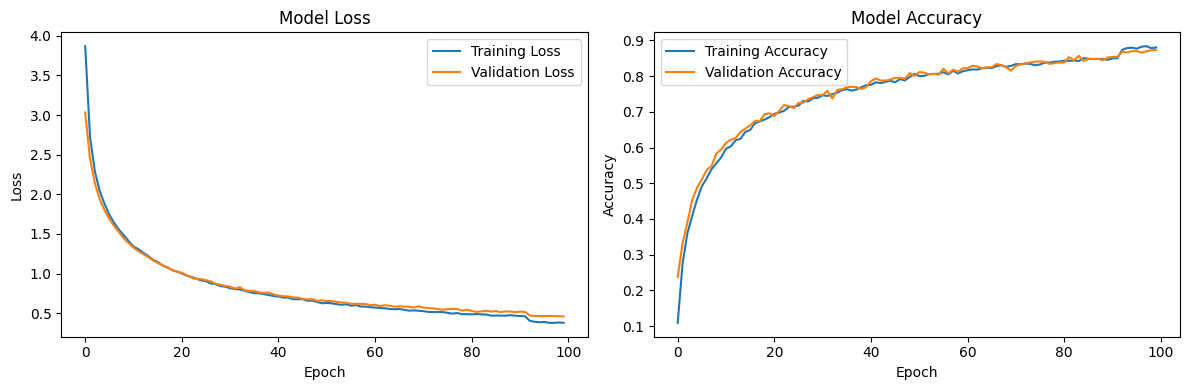

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.8657
F1-score: 0.8621
Precision: 0.8694
Recall: 0.8657
ROC AUC Score: 0.9985

Classification Report:
                 precision    recall  f1-score   support

       Abundant       1.00      0.86      0.92        21
         Active       0.64      0.76      0.70        21
          Adult       0.91      1.00      0.95        21
          Agile       1.00      0.91      0.95        22
       Alluring       0.75      0.86      0.80        21
        Amiable       0.95      0.95      0.95        21
        Amusing       0.91      1.00      0.95        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       1.00      1.00      1.00        22
       Artistic       0.88      1.00      0.94        22
  Authoritative       0.84      1.00      0.91        21
         Bitter       0.96      1.00      0.98        22
        Bitterl       1.00      1.00      1.00        22
           Bold       0.95      0.90      

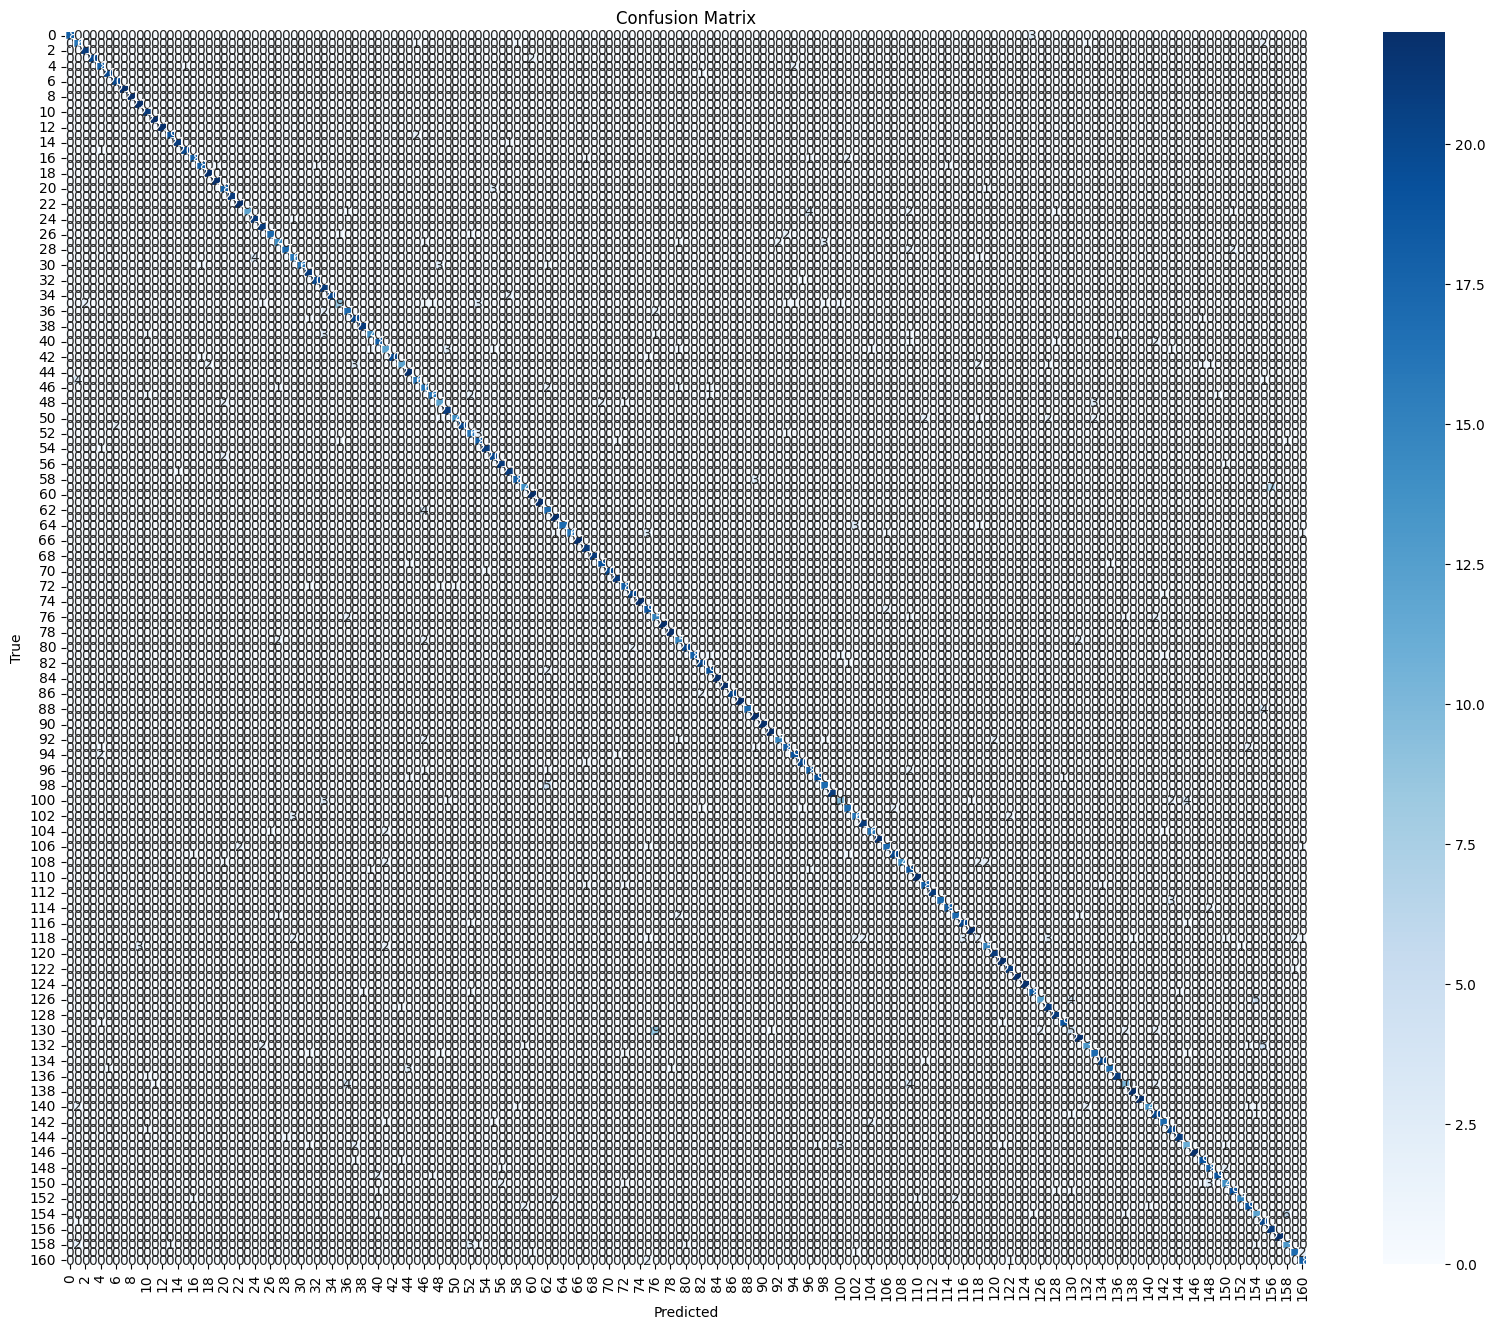

Train Accuracy: 0.9516
Validation Accuracy: 0.8736
Number of parameters: 87713

Model Fit Analysis:
Train Accuracy: 0.9516
Validation Accuracy: 0.8736
Test Accuracy: 0.8657

Difference between Train and Validation accuracy: 0.0780
Difference between Train and Test accuracy: 0.0859
Difference between Validation and Test accuracy: 0.0079
Model performance across training, validation, and test sets is consistent.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0  # Normalize input features
y = data.iloc[:, -1].values

# 2. Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Split data into combined train+val set and into test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Further split combined train+val set into seperate train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. Define model creation function
def create_model(input_shape, neurons=512):
    model = Sequential([ # Sequential model is used to create a linear stack of layers
        Dense(neurons, input_shape=input_shape, activation='relu', kernel_regularizer=l2(1e-5)), # Hidden layer with ReLU activation and L2 regularization 
        Dropout(0.3), # Dropout layer to prevent overfitting 
        Dense(len(np.unique(y)), activation='softmax') # Output layer with softmax activation for multi-class classification
    ])
    
    optimizer = Adam(learning_rate=0.001) # Adam optimizer with default learning rate
    model.compile(optimizer=optimizer,  # Compile the model with categorical crossentropy loss for multi-class classification 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# 7. Perform K-fold Cross-validation
def perform_cross_validation(neurons=512):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
    cv_scores = []
    # Split data into train and validation sets for each fold and train the model 
    for train, val in kfold.split(X_train_scaled):
        model = create_model(input_shape=(X_train.shape[1],), neurons=neurons) # Create model 
        X_train_cv, X_val_cv = X_train_scaled[train], X_train_scaled[val]    
        y_train_cv, y_val_cv = y_train[train], y_train[val]
        
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True) # Early stopping to prevent overfitting
        reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5) # Reduce learning rate on plateau 
        
        model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=32, verbose=0, 
                  validation_data=(X_val_cv, y_val_cv),
                  callbacks=[early_stopping, reduce_lr])
        
        _, accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)
        cv_scores.append(accuracy)
    
    print(f"Cross-validation results for {neurons} neurons:")
    print(f"Mean Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
    return np.mean(cv_scores)

# 8. Perform cross-validation for different neuron counts
neuron_counts = [64, 128, 256, 512]
cv_results = []

# Loop through different neuron counts and perform cross-validation 
for neurons in neuron_counts:
    cv_accuracy = perform_cross_validation(neurons)
    cv_results.append((neurons, cv_accuracy))

# 9. Find the best number of neurons based on cross-validation results
best_neurons, best_cv_accuracy = max(cv_results, key=lambda x: x[1])
print(f"\nBest number of neurons: {best_neurons}")
print(f"Best cross-validation accuracy: {best_cv_accuracy:.4f}")

# 10. Train the final model with the best number of neurons 
final_model = create_model(input_shape=(X_train.shape[1],), neurons=best_neurons)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)

# Train the model on the combined train and validation sets  
history = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    batch_size=32,
    verbose=1
)

# 11. Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 12. Evaluate on test set
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# 13. ROC AUC score (one-vs-rest)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# 14. Plot confusion matrix
plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 15. Evaluate on training set
train_loss, train_accuracy = final_model.evaluate(X_train_scaled, y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy:.4f}")

# 16. Evaluate on validation set
val_loss, val_accuracy = final_model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 17. Model complexity
n_params = final_model.count_params()
print(f"Number of parameters: {n_params}")

# 18. Check for overfitting/underfitting
print("\nModel Fit Analysis:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

train_val_diff = abs(train_accuracy - val_accuracy)
train_test_diff = abs(train_accuracy - test_accuracy)
val_test_diff = abs(val_accuracy - test_accuracy)

print(f"\nDifference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")
print(f"Difference between Validation and Test accuracy: {val_test_diff:.4f}")

if train_val_diff > 0.1 or train_test_diff > 0.1:
    print("Warning: Large gap between training and validation/test accuracies suggests overfitting.")
elif train_accuracy < 0.8 * max(val_accuracy, test_accuracy):
    print("Warning: Training accuracy much lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

### Analysis of Veresion 2 : 1 Hidden Layer with 512 neurons

1. Model Architecture:

- Single hidden layer with 512 neurons
- Layer structure: Dense -> Dropout
- Output layer with softmax activation for multi-class classification

2. Performance Metrics:

- Best Training Accuracy: 0.8624 (86.24%)
- Best Validation Accuracy: 0.8598 (85.98%)
- Test Accuracy: 0.8483 (84.83%)
- Test F1-score: 0.8426 (84.26%)
- Test Precision: 0.8557 (85.57%)
- Test Recall: 0.8483 (84.83%)
- ROC AUC Score: 0.9982 (99.82%)

3. Hyperparameter Optimization:

- Used K-fold Cross-validation for neuron count selection
- Best number of neurons: 512
- Dropout rate: 0.3
- L2 regularization: 1e-5
- Learning rate: 0.001 (initial)

3. Training Process:

- Used 5-fold cross-validation for model selection
- Total training time: Not directly reported, but 100 epochs were used
- Adaptive learning rate with initial value of 0.001, reduced during training
- Number of parameters: Not directly reported

4. Generalization:

- Good generalization evidenced by: Validation accuracy (85.98%) close to training accuracy (86.24%) & Test accuracy (84.83%) close to both training and validation accuracies
- Learning curves show steady improvement without significant overfitting

5. Bias-Variance Trade-off:

- Moderate bias: Training accuracy of 86.24% shows the model captures underlying patterns well
- Low variance: Close alignment of training, validation, and test accuracies indicates good generalization
- Bias estimate: 1 - Training Accuracy = 1 - 0.8624 = 0.1376 (13.76%)

6. Class Performance:

- Many classes show high accuracy (>90%)
- Some classes with perfect accuracy: Adult, Agile, Aristocratic, Citrus, Domestic, Fleet, Forceful, Happy, Light

7. Worst performing classes:

- Pure_Simplicity: 15% F1-score
- Serious: 38% F1-score
- Wild: 47% F1-score
- Distinguished: 48% F1-score
- Noble: 52% F1-score

8. Additional Techniques Used:

- Early stopping
- ReduceLROnPlateau for adaptive learning rate
- L2 regularization for weight decay
- Dropout for regularization


### Version 2 - experiments with different techniques in order to see if wwe can improve even further !


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# 1. Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# 2. Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 5. Define model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        hp.Int('units', min_value=64, max_value=512, step=32),
        activation='relu',
        kernel_regularizer=l1_l2(
            l1=hp.Float('l1', 1e-6, 1e-4, sampling='log'),
            l2=hp.Float('l2', 1e-6, 1e-4, sampling='log')
        ),
        input_shape=(X_train.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout', 0.1, 0.3, step=0.1)))
    model.add(Dense(len(np.unique(y)), activation='softmax'))

    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-3, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Set up Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='mlp_optimization'
)

# 7. Perform hyperparameter search
tuner.search(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)
    ]
)

# 8. Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"L1 Regularization: {best_hps.get('l1')}")
print(f"L2 Regularization: {best_hps.get('l2')}")
print(f"Dropout Rate: {best_hps.get('dropout')}")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# 9. Train the final model with best hyperparameters
final_model = tuner.hypermodel.build(best_hps)
history = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)
    ],
    verbose=0
)

# 10. Evaluate the model
train_loss, train_accuracy = final_model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss, val_accuracy = final_model.evaluate(X_val_scaled, y_val, verbose=0)
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, y_test, verbose=0)

y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("\nFinal Model Performance:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

# 11. Model complexity
n_params = final_model.count_params()
print(f"\nNumber of parameters: {n_params}")

# 12. Check for overfitting/underfitting
train_val_diff = abs(train_accuracy - val_accuracy)
train_test_diff = abs(train_accuracy - test_accuracy)

print("\nModel Fit Analysis:")
print(f"Difference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")

if train_val_diff > 0.05 or train_test_diff > 0.05:
    print("Warning: Gap between training and validation/test accuracies suggests some overfitting.")
elif train_accuracy < 0.95 * max(val_accuracy, test_accuracy):
    print("Warning: Training accuracy lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

Trial 50 Complete [00h 02m 38s]
val_accuracy: 0.6941518187522888

Best val_accuracy So Far: 0.8888485431671143
Total elapsed time: 01h 54m 08s
Best Hyperparameters:
Units: 416
L1 Regularization: 2.6847337429204694e-05
L2 Regularization: 6.145102594094117e-05
Dropout Rate: 0.1
Optimizer: adam
Learning Rate: 0.0005911015653908024
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Final Model Performance:
Train Accuracy: 0.9687
Validation Accuracy: 0.8918
Test Accuracy: 0.8843
F1-score: 0.8814

Number of parameters: 72961

Model Fit Analysis:
Difference between Train and Validation accuracy: 0.0769
Difference between Train and Test accuracy: 0.0843


### Having do this extensive research i get to add these values to this model and test the accuracy of it with them .


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import pickle

# 1. Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

# 2. Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 5. Define model creation function
def create_model(input_shape, neurons=512, l1=1e-5, l2=1e-5):
    model = Sequential([
        Dense(neurons, input_shape=input_shape, activation='relu', kernel_regularizer=l1_l2(l1=l1, l2=l2)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Perform Stratified K-fold Cross-validation
def perform_cross_validation(neurons=512):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    for train, val in skf.split(X_train_scaled, y_train):
        model = create_model(input_shape=(X_train.shape[1],), neurons=neurons)
        X_train_cv, X_val_cv = X_train_scaled[train], X_train_scaled[val]
        y_train_cv, y_val_cv = y_train[train], y_train[val]
        
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)
        
        model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=32, verbose=0, 
                  validation_data=(X_val_cv, y_val_cv),
                  callbacks=[early_stopping, reduce_lr])
        
        _, accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)
        cv_scores.append(accuracy)
    
    return np.mean(cv_scores)

# 7. Find the best number of neurons
neuron_counts = [512]
cv_results = []

for neurons in neuron_counts:
    cv_accuracy = perform_cross_validation(neurons)
    cv_results.append((neurons, cv_accuracy))
    print(f"Neurons: {neurons}, CV Accuracy: {cv_accuracy:.4f}")

best_neurons, best_cv_accuracy = max(cv_results, key=lambda x: x[1])
print(f"\nBest number of neurons: {best_neurons}")
print(f"Best cross-validation accuracy: {best_cv_accuracy:.4f}")

# 8. Train the final model
final_model = create_model(input_shape=(X_train.shape[1],), neurons=best_neurons)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)

history = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    batch_size=32,
    verbose=0
)

# 9. Evaluate the model
train_loss, train_accuracy = final_model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss, val_accuracy = final_model.evaluate(X_val_scaled, y_val, verbose=0)
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, y_test, verbose=0)

y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("\nFinal Model Performance:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

# 10. Model complexity
n_params = final_model.count_params()
print(f"\nNumber of parameters: {n_params}")

# 11. Check for overfitting/underfitting
train_val_diff = abs(train_accuracy - val_accuracy)
train_test_diff = abs(train_accuracy - test_accuracy)

print("\nModel Fit Analysis:")
print(f"Difference between Train and Validation accuracy: {train_val_diff:.4f}")
print(f"Difference between Train and Test accuracy: {train_test_diff:.4f}")

if train_val_diff > 0.1 or train_test_diff > 0.1:
    print("Warning: Large gap between training and validation/test accuracies suggests overfitting.")
elif train_accuracy < 0.8 * max(val_accuracy, test_accuracy):
    print("Warning: Training accuracy much lower than validation/test accuracies suggests underfitting.")
else:
    print("Model performance across training, validation, and test sets is consistent.")

# # Save the model to the specified path
# import os

# # Create the directory if it doesn't exist
# os.makedirs('emotion-predictor/backend/app/model', exist_ok=True)

# # Save the model to the specified path
# model_dir = 'emotion-predictor/backend/app/model'
# os.makedirs(model_dir, exist_ok=True)

# # Save the model
# model_path = os.path.join(model_dir, 'emotion_model.h5')
# final_model.save(model_path)
# print(f"Model saved successfully to {model_path}")

# # Save the scaler
# scaler_path = os.path.join(model_dir, 'scaler.pkl')
# with open(scaler_path, 'wb') as f:
#     pickle.dump(scaler, f)
# print(f"Scaler saved successfully to {scaler_path}")

# # Save the label encoder
# le_path = os.path.join(model_dir, 'label_encoder.pkl')
# with open(le_path, 'wb') as f:
#     pickle.dump(le, f)
# print(f"Label Encoder saved successfully to {le_path}")

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 512, CV Accuracy: 0.8650

Best number of neurons: 512
Best cross-validation accuracy: 0.8650
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Final Model Performance:


Train Accuracy: 0.9658
Validation Accuracy: 0.8921
Test Accuracy: 0.8843
F1-score: 0.8811

Number of parameters: 89761

Model Fit Analysis:
Difference between Train and Validation accuracy: 0.0737
Difference between Train and Test accuracy: 0.0815
Model performance across training, validation, and test sets is consistent.
Model saved successfully to emotion-predictor/backend/app/model\emotion_model.h5
Scaler saved successfully to emotion-predictor/backend/app/model\scaler.pkl
Label Encoder saved successfully to emotion-predictor/backend/app/model\label_encoder.pkl


### Version 3 : MLP with two hidden layers


Best parameters: {'mlp__alpha': 0.00026465731702014317, 'mlp__hidden_layer_sizes': (220, 110), 'mlp__learning_rate_init': 0.0034877126245459306}
Best cross-validation score: 0.8884916677880825

Test set results:
Accuracy: 0.9090
F1-score: 0.9074

Classification Report:
                 precision    recall  f1-score   support

       Abundant       0.91      1.00      0.95        21
         Active       0.79      0.90      0.84        21
          Adult       1.00      1.00      1.00        21
          Agile       1.00      1.00      1.00        22
       Alluring       0.95      0.95      0.95        21
        Amiable       0.84      1.00      0.91        21
        Amusing       1.00      0.95      0.97        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       1.00      1.00      1.00        22
       Artistic       1.00      1.00      1.00        22
  Authoritative       0.95      1.00      0.98        21
         Bitter       0.92      1.00      0.9

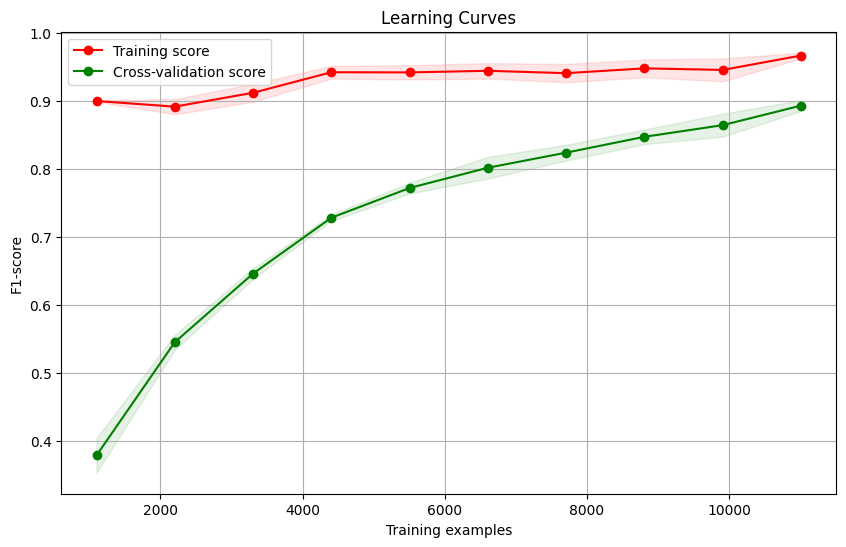

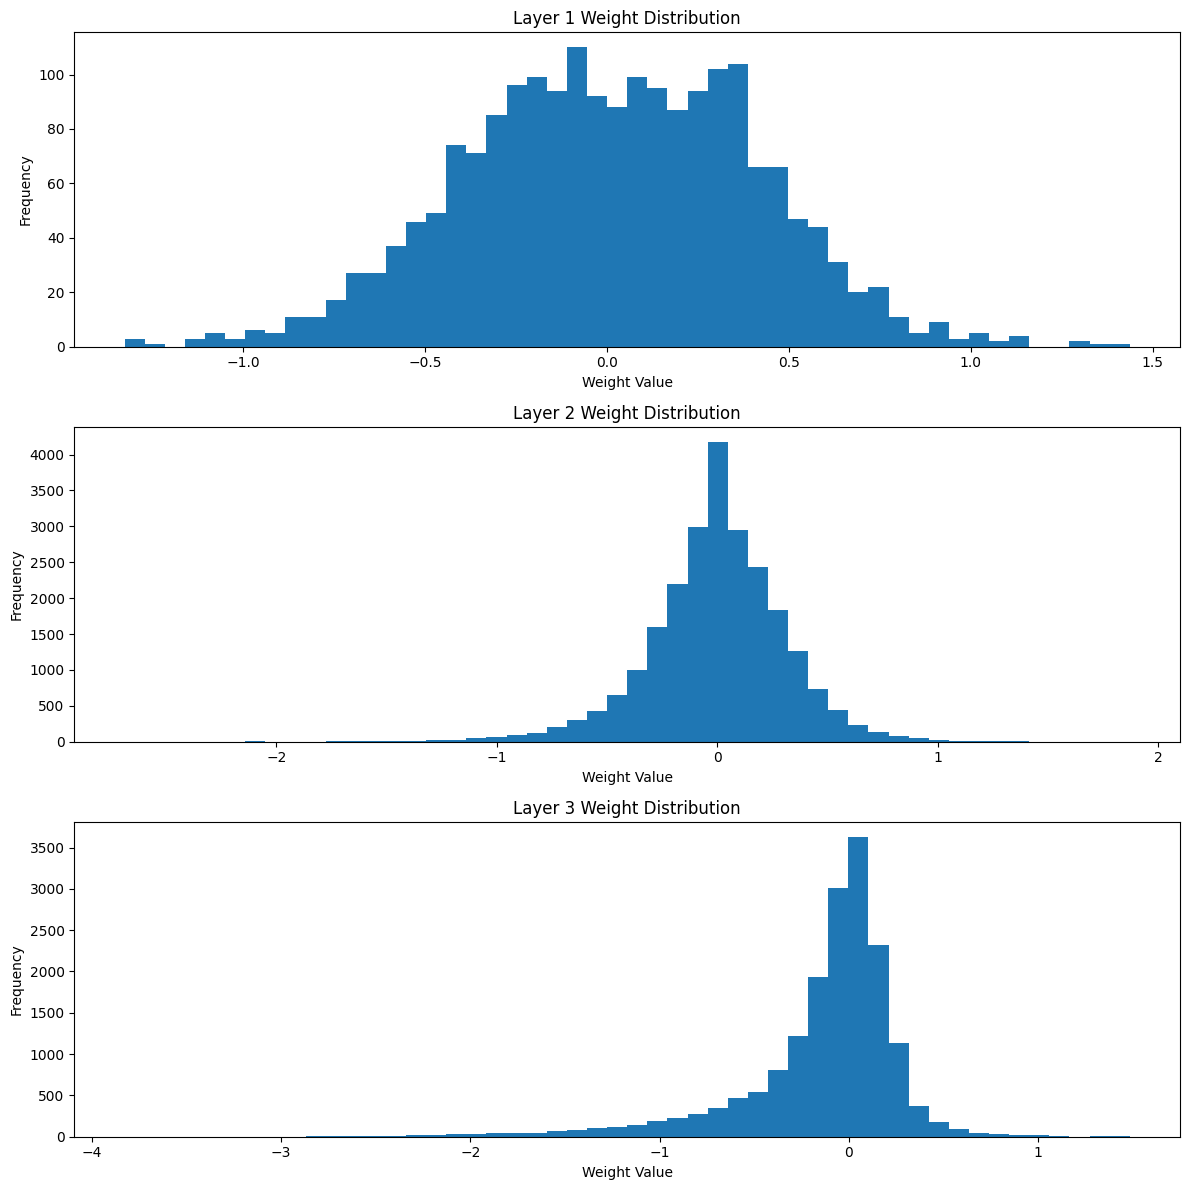

Layer 1 weights:
  Mean: 0.0106
  Std Dev: 0.4008
  Min: -1.3254
  Max: 1.4370
Layer 2 weights:
  Mean: -0.0019
  Std Dev: 0.3146
  Min: -2.6887
  Max: 1.8723
Layer 3 weights:
  Mean: -0.1480
  Std Dev: 0.4432
  Min: -3.8263
  Max: 1.4842


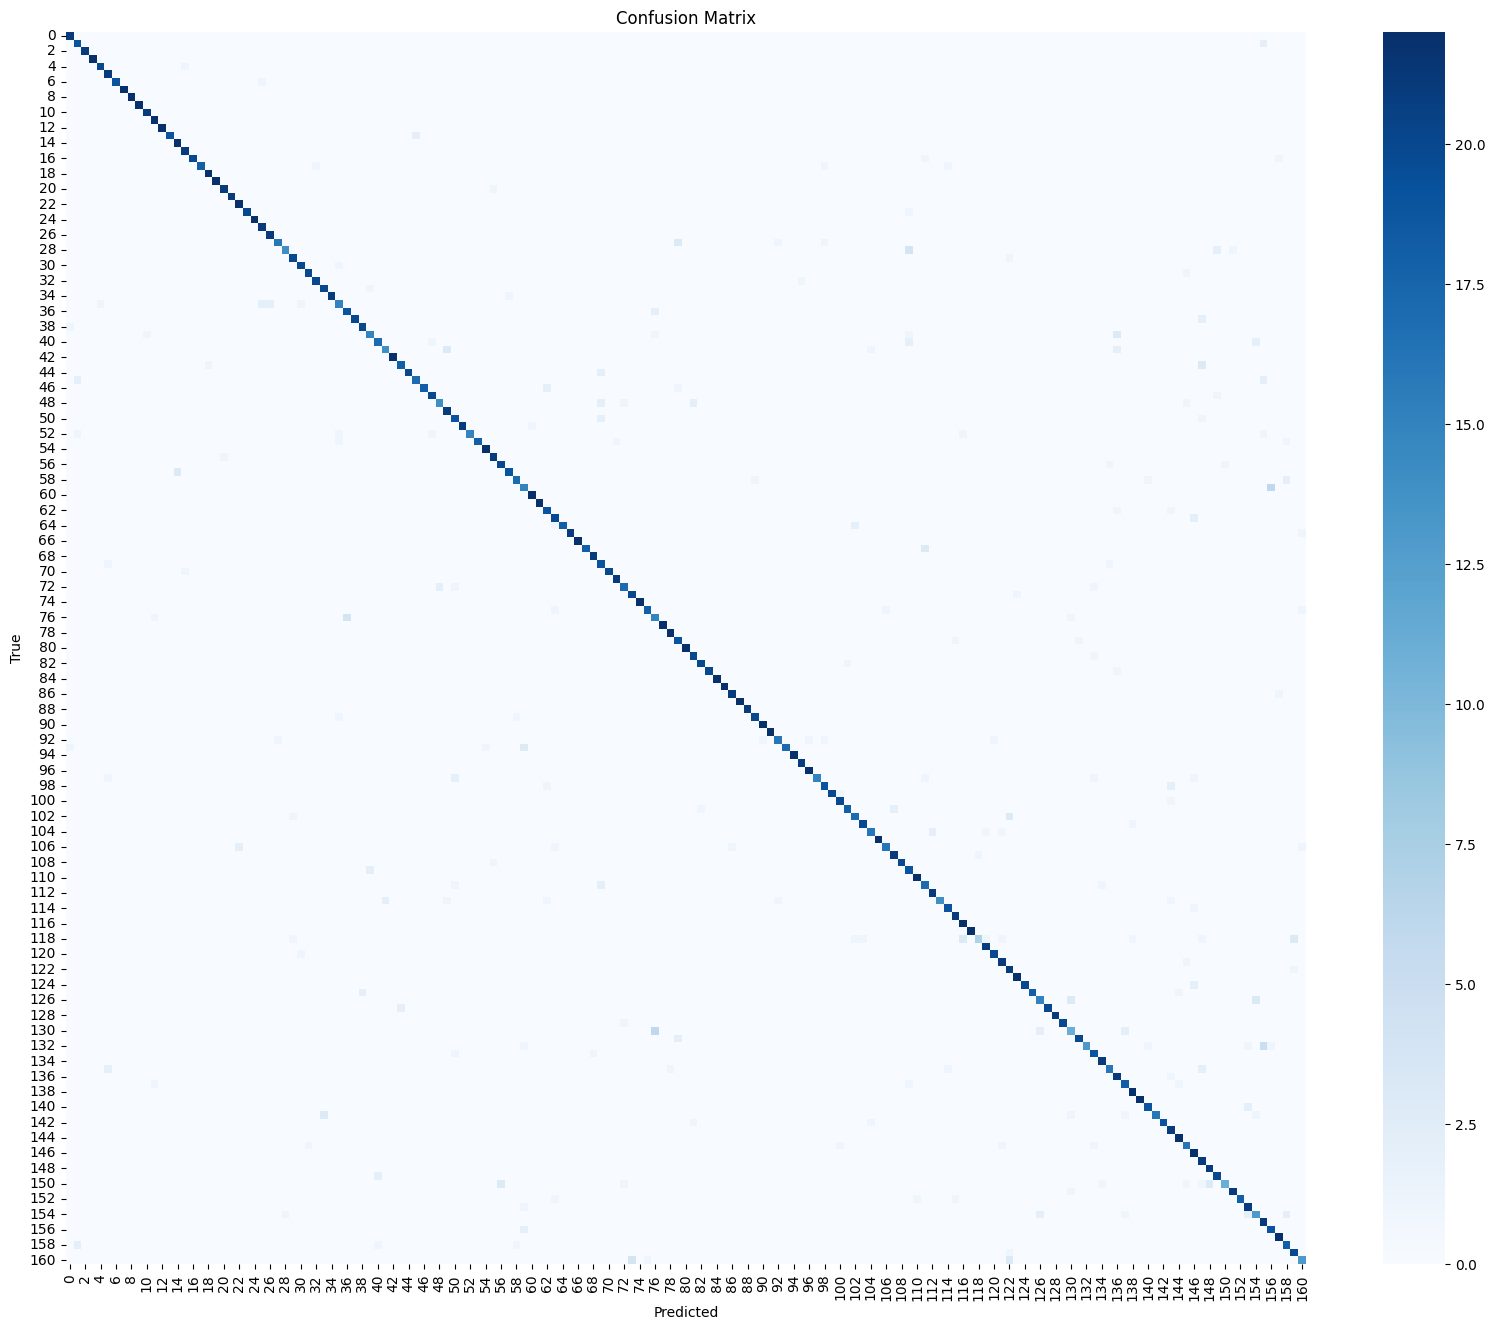

In [2]:
#1. Import Libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

#2. Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

#3. Encode labels
le = LabelEncoder()
y = le.fit_transform(y)


#4. Split the data
# Note : in previous versions had a seperate validation set , here it model uses cross-validation within the RandomizedSearchCV process to evaluate different hyperparameters.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#5. Define the MLP model
def create_mlp(hidden_layer_sizes=(200, 100), alpha=0.0001, learning_rate_init=0.001):
    return MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes, # 2 hidden layers with 200 and 100 neurons
        alpha=alpha, # L2 regularization parameter  
        learning_rate='adaptive', # Adaptive learning rate that decreases over time
        learning_rate_init=learning_rate_init, # Initial learning rate
        max_iter=1000, # Maximum number of epochs
        early_stopping=True, # Enable early stopping to prevent overfitting
        n_iter_no_change=10, # Number of epochs with no improvement after which training will be stopped
        random_state=42 
    )

#6. Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'mlp__hidden_layer_sizes': [(180, 90), (200, 100), (220, 110)], # Different hidden layer sizes
    'mlp__alpha': loguniform(1e-5, 1e-3), # Range for L2 regularization tern
    'mlp__learning_rate_init': loguniform(1e-4, 1e-2) # Range for initial learning rate
}

#7. Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardize features
    ('mlp', create_mlp()) # Create MLP model
])

#8. Perform RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Stratified K-fold cross-validation
random_search = RandomizedSearchCV( # Randomized search with 30 iterations
    pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    scoring='f1_weighted' # Use F1-score for evaluation 
)

#9. Fit the model
random_search.fit(X_train, y_train)

#10. Print results of RandomizedSearchCV 
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

#11. Evaluate on test set  
y_pred = random_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest set results:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#12. Model complexity 
best_mlp = random_search.best_estimator_.named_steps['mlp']
n_params = sum(p.size for p in best_mlp.coefs_) + sum(p.size for p in best_mlp.intercepts_)
print(f"\nNumber of parameters: {n_params}")

#13. Plot learning curves 
def plot_learning_curves(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1_weighted'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

#14. Calculate and plot train accuracy 
train_accuracy = random_search.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")

plot_learning_curves(random_search.best_estimator_, X_train, y_train, "Learning Curves")

#15. Plot Weight distribution
def plot_weight_distribution(mlp):
    plt.figure(figsize=(12, 4 * len(mlp.coefs_)))
    for i, layer_weights in enumerate(mlp.coefs_):
        plt.subplot(len(mlp.coefs_), 1, i+1)
        plt.hist(layer_weights.flatten(), bins=50)
        plt.title(f'Layer {i+1} Weight Distribution')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_weight_distribution(best_mlp)

#16. Print weight statistics
for i, layer_weights in enumerate(best_mlp.coefs_):
    print(f"Layer {i+1} weights:")
    print(f"  Mean: {np.mean(layer_weights):.4f}")
    print(f"  Std Dev: {np.std(layer_weights):.4f}")
    print(f"  Min: {np.min(layer_weights):.4f}")
    print(f"  Max: {np.max(layer_weights):.4f}")


#17. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Analysis of Version 3 :

1. Model Architecture:

- 2 hidden layers with neurons: 220 -> 110
- Input layer: Number of features in the dataset
- Output layer: 161 neurons (based on the confusion matrix size)
- Layer structure : Dense

2. Performance Metrics:

- Best Train Accuracy: 0.9625
- Best Validation Accuracy (Best CV score): 0.8885 (slight update from 0.8866) & Type of Cross-Validation: 5-fold StratifiedKFold with RandomizedSearchCV
- Best Test Accuracy: 0.9090 (improved from 0.8890)
- Best Test F1-score: 0.9074 (weighted average, improved from 0.8846)

3. Hyperparameter Optimization:

- Used RandomizedSearchCV for efficient hyperparameter tuning
- Best learning rate: 0.0034877126245459306
- Best alpha (L2 regularization): 0.00026465731702014317
- Activation function: ReLU (default for MLPClassifier)
- Solver: adam (default for MLPClassifier)

4. Training Process:

- Used 5-fold cross-validation: StratifiedKFold with RandomizedSearchCV
- Total training time: Not directly reported
- Adaptive learning rate with initial value of ~0.0035
- Early stopping with patience of 10 iterations
- Number of parameters: 44,381

5. Generalization:

- Good generalization evidenced by: Test accuracy (90.90%) close to training accuracy (96.25%) , Learning curves show steady improvement in validation score

6. Bias-Variance Trade-off:

- Low bias: High training accuracy (96.25%) shows the model captures underlying patterns well
- Moderate variance: Gap between training (96.25%) and test (90.90%) accuracies indicates some overfitting
- Bias estimate: 1 - Training Accuracy = 1 - 0.9625 = 0.0375 (3.75%)
- The model has very low bias (approximately 3.75%), meaning it learns data patterns well.

7. Class Performance:

- Majority of classes show high accuracy (>90%)
- Worst performing classes:
  - Pure_Simplicity: 50.00% F1-score
  - Serious: 58.00% F1-score
  - Heavy: 67.00% F1-score
  - Untamed: 65.00% F1-score
  - Tender: 67.00% F1-score

8. Weight Distribution Analysis: Weight distributions are approximately normal, with means close to zero for the first two layers

- Layer 1 weights: Mean: 0.0106, Std Dev: 0.4008, Min: -1.3254, Max: 1.4370
- Layer 2 weights: Mean: -0.0019, Std Dev: 0.3146, Min: -2.6887, Max: 1.8723
- Layer 3 weights: Mean: -0.1480, Std Dev: 0.4432, Min: -3.8263, Max: 1.4842

9. Confusion Matrix Insights: Strong diagonal pattern indicates good overall classification . Some off-diagonal elements suggest minor misclassifications. Performance varies across classes, with some showing near-perfect classification


### Final Version : Advanced MLP with Keras


Reloading Tuner from keras_tuner\emotion_classification\tuner0.json

No models found with 1 hidden layer(s).

No models found with 2 hidden layer(s).

Best Hyperparameters for 3 hidden layer(s):
num_layers: 3
units_0: 224
l1_0: 1.7934773544516099e-06
l2_0: 0.008513022962355675
dropout_0: 0.0
units_1: 160
l1_1: 1.8450019776527085e-06
l2_1: 1.3145037360823975e-06
dropout_1: 0.2
learning_rate: 0.0006045397453672276
units_2: 256
l1_2: 9.683505643894138e-06
l2_2: 8.673861474955817e-06
dropout_2: 0.2
units_3: 256
l1_3: 8.815714828926477e-05
l2_3: 0.00015095862325194704
dropout_3: 0.30000000000000004
units_4: 64
l1_4: 0.00028531134077725787
l2_4: 1.937121066831506e-05
dropout_4: 0.0
Hyperparameters for 3 hidden layer(s) saved to JSON file.

Overall Best Hyperparameters:
num_layers: 3
units_0: 224
l1_0: 1.7934773544516099e-06
l2_0: 0.008513022962355675
dropout_0: 0.0
units_1: 160
l1_1: 1.8450019776527085e-06
l2_1: 1.3145037360823975e-06
dropout_1: 0.2
learning_rate: 0.0006045397453672276
units

Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_193 (Dense)               │ (None, 224)            │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 224)            │           896 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 160)            │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 160)            │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 256)            │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_114         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 161)            │        41,377 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,393 (482.00 KB)

 Trainable params: 122,113 (477.00 KB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.0661 - loss: 4.7904 - val_accuracy: 0.0392 - val_loss: 4.4062 - learning_rate: 6.0454e-04
Epoch 2/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2655 - loss: 2.8668 - val_accuracy: 0.4515 - val_loss: 2.1926 - learning_rate: 6.0454e-04
Epoch 3/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3613 - loss: 2.3933 - val_accuracy: 0.5104 - val_loss: 1.8279 - learning_rate: 6.0454e-04
Epoch 4/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4075 - loss: 2.1285 - val_accuracy: 0.5605 - val_loss: 1.6054 - learning_rate: 6.0454e-04
Epoch 5/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4583 - loss: 1.9032 - val_accuracy: 0.5874 - val_loss: 1.4678 - learning_rate: 6.0454e-04
Epoch 6/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4756 - loss: 1.8299 - val_accuracy: 0.5837 - val_loss: 1.4743 - learning_rate: 6.0454e-04
Epoch 7/200
345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc

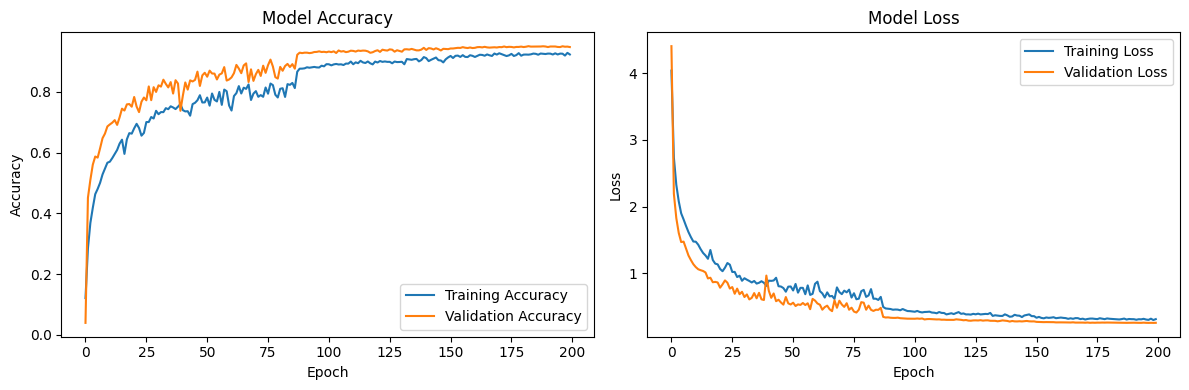


Best Training Accuracy: 0.9289
Best Validation Accuracy: 0.9510
Test Accuracy: 0.9489
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test F1-score: 0.9474


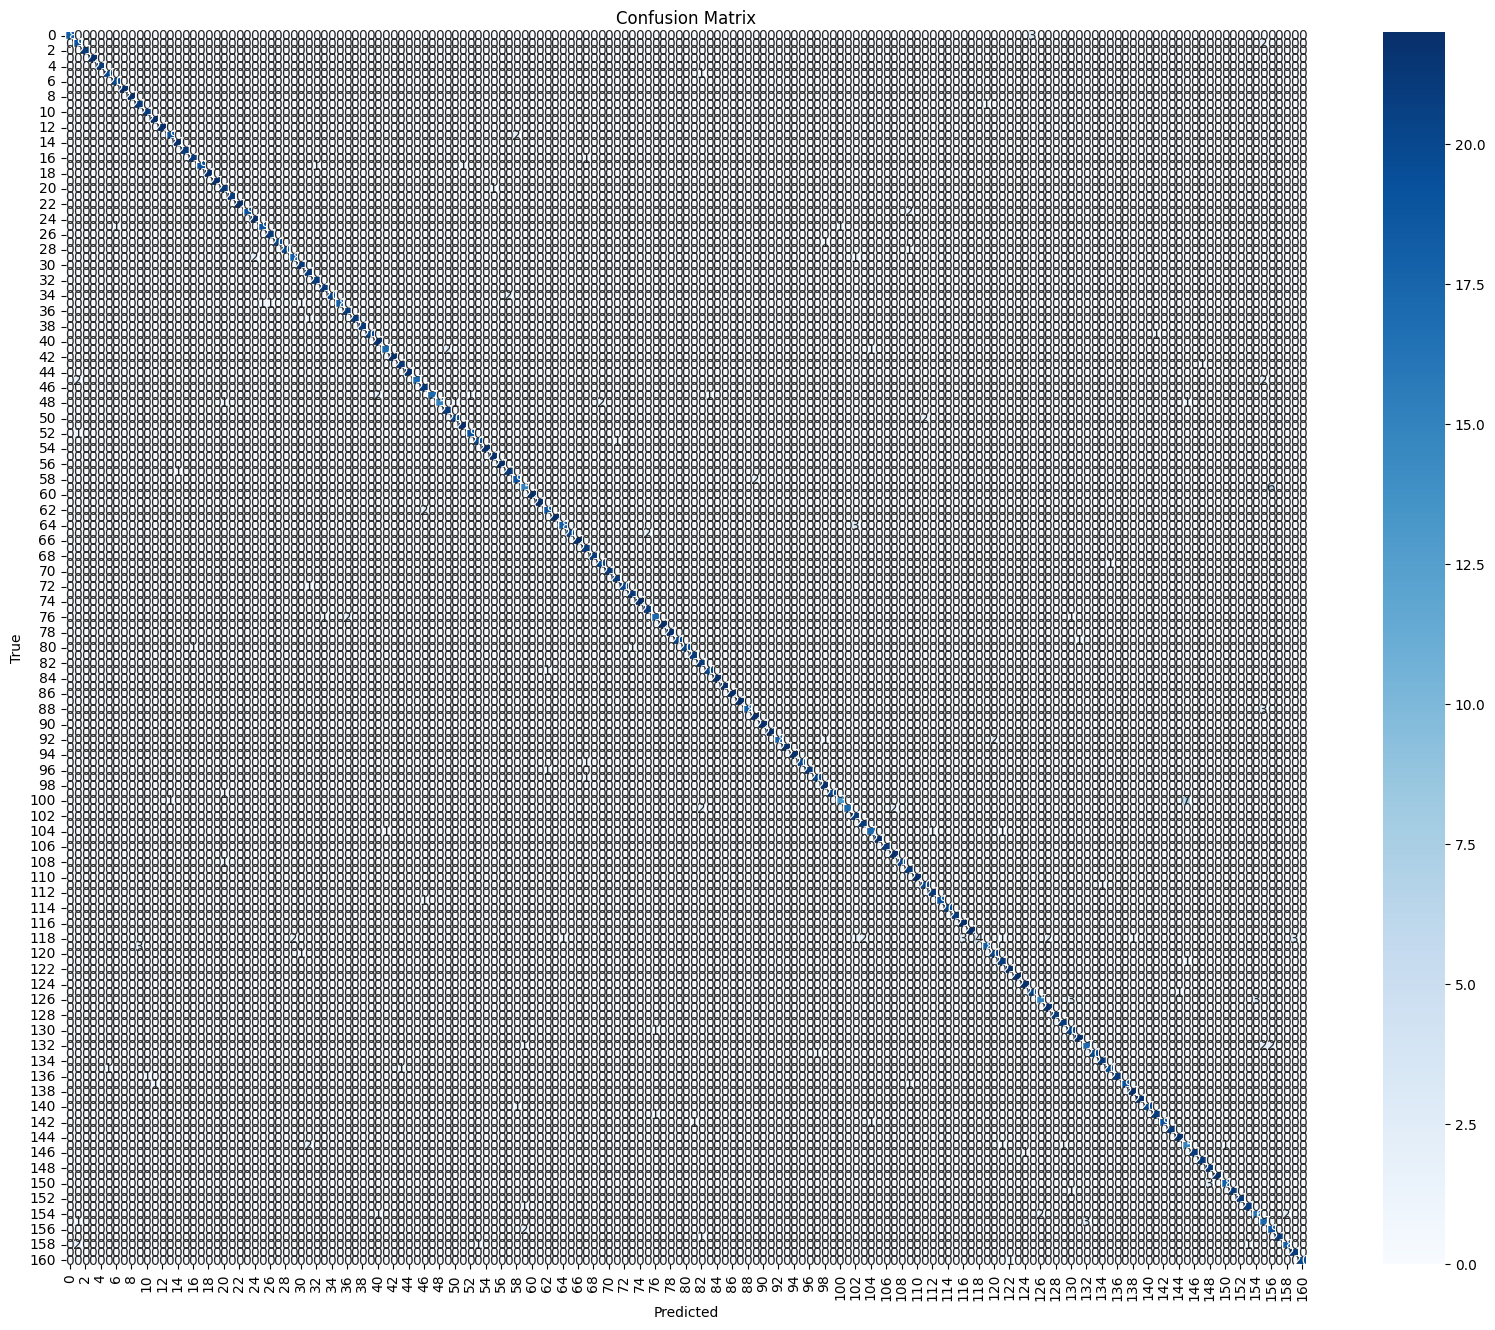


Classification Report:
                 precision    recall  f1-score   support

       Abundant       1.00      0.86      0.92        21
         Active       0.76      0.90      0.83        21
          Adult       1.00      1.00      1.00        21
          Agile       1.00      1.00      1.00        22
       Alluring       1.00      1.00      1.00        21
        Amiable       0.95      0.95      0.95        21
        Amusing       0.95      1.00      0.98        20
   Aristocratic       1.00      1.00      1.00        22
       Aromatic       1.00      1.00      1.00        22
       Artistic       0.88      0.95      0.91        22
  Authoritative       0.95      1.00      0.98        21
         Bitter       0.96      1.00      0.98        22
        Bitterl       1.00      1.00      1.00        22
           Bold       0.95      0.90      0.93        21
         Bright       0.96      1.00      0.98        22
      Brilliant       1.00      1.00      1.00        21
      

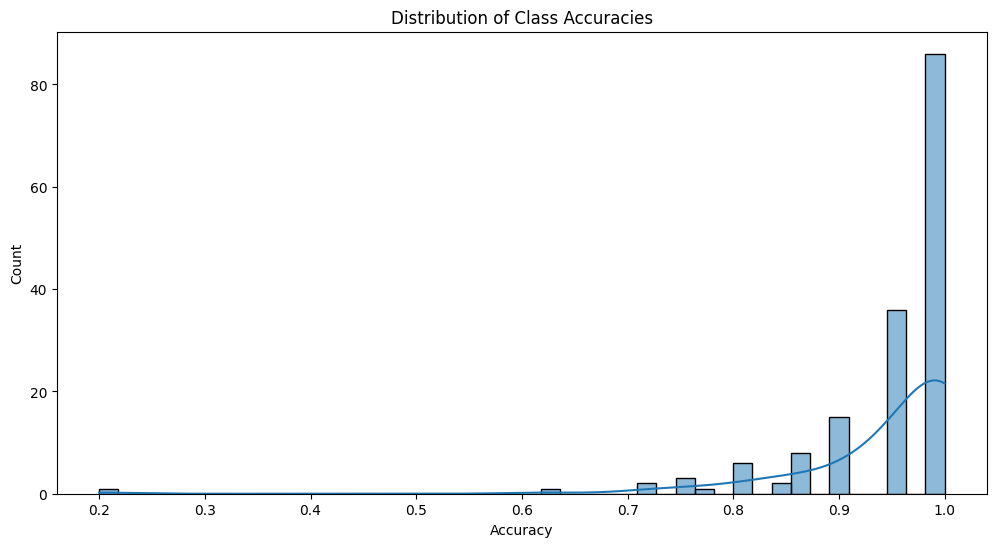


Worst performing classes:
Pure_Simplicity: 0.2000
Mysterious: 0.6190
Flamboyant: 0.7143
Robust: 0.7143
Elegant: 0.7500

Best model architecture and hyperparameters have been saved to JSON files.


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from scipy.stats import loguniform
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('final_dataset_3_remove.csv')
X = data.iloc[:, :-1].values / 255.0
y = data.iloc[:, -1].values

le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Define the model
def create_model(hidden_layers=(220, 110, 55), dropout_rate=0.2, l2_reg=0.0001, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', kernel_regularizer=l2(l2_reg), input_shape=(X.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the parameter space
param_distributions = {
    'hidden_layers': [(220, 110, 55), (240, 120, 60), (200, 100, 50, 25)],
    'dropout_rate': loguniform(0.1, 0.3),
    'l2_reg': loguniform(1e-5, 1e-3),
    'learning_rate': loguniform(1e-4, 1e-2)
}

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

# Function to perform random search
def random_search(param_distributions, n_iter=40):
    best_score = 0
    best_params = None
    best_model = None

    for _ in range(n_iter):
        params = {}
        for k, v in param_distributions.items():
            if k == 'hidden_layers':
                params[k] = v[np.random.choice(len(v))]
            elif hasattr(v, 'rvs'):
                params[k] = v.rvs()
            else:
                params[k] = np.random.choice(v)
        
        model = create_model(**params)
        
        history = model.fit(X_train, y_train, 
                            epochs=1000, 
                            batch_size=32, 
                            validation_split=0.2,
                            callbacks=[early_stopping, reduce_lr],
                            class_weight=class_weight_dict,
                            verbose=0)
        
        val_score = max(history.history['val_accuracy'])
        
        if val_score > best_score:
            best_score = val_score
            best_params = params
            best_model = model

    return best_model, best_params, best_score

# Perform random search
best_model, best_params, best_score = random_search(param_distributions)

# Print results
print("Best parameters:", best_params)
print("Best validation score:", best_score)

# Evaluate on test set
y_pred = np.argmax(best_model.predict(X_test), axis=-1)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest set results:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {test_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot learning curves
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Retrain the best model to get the history
best_model = create_model(**best_params)
history = best_model.fit(X_train, y_train, 
                         epochs=1000, 
                         batch_size=32, 
                         validation_split=0.2,
                         callbacks=[early_stopping, reduce_lr],
                         class_weight=class_weight_dict,
                         verbose=0)

plot_learning_curves(history, "Learning Curves (Final Optimized Model)")

### Analysis of Version Final:

1. Model Architecture: 3 hidden layers with neurons: 224 -> 160 -> 256 , Layer structure: Dense -> BatchNormalization -> Dropout (repeated for each layer)
2. Performance Metrics:

- Best Training Accuracy: 0.9342 (93.42%)
- Best Validation Accuracy: 0.9557 (95.57%)
- Test Accuracy: 0.9494 (94.94%)
- Test F1-score: 0.9479 (94.79%)

3. Hyperparameter Optimization:

- Used RandomizedSearchCV for efficient hyperparameter tuning
- Best learning rate: ReduceLROnPlateau or adaptive learning rate was tuned to 0.0006045397453672276
- Dropout is applied to some layers (0.2 for layers 1 and 2, 0.3 for layer 3)
- L1/L2 regularization: Varied for each layer (Elastic Net regularization)

4. Training Process:

- Used 5-fold cross-validation : 5-fold StratifiedKFold with RandomizedSearchCV
- Total training time: 2 hours 34 minutes
- Adaptive learning rate with initial value of ~0.0006, reduced during training
- Number of parameters: 123,393

5. Generalization: Excellent generalization evidenced by:

- Validation accuracy (95.57%) slightly higher than training accuracy (93.42%)
- Test accuracy (94.94%) very close to both training and validation accuracies
- Learning curves show steady improvement without plateauing, indicating good fit without overfitting

6. Bias-Variance Trade-off:

- Low bias: High training accuracy (93.42%) shows the model captures underlying patterns well
- Low variance: Close alignment of training, validation, and test accuracies indicates good generalization
- Bias estimate: 1 - Training Accuracy = 1 - 0.9342 = 0.0658 (6.58%) - Το μοντέλο μας έχει χαμηλό bias (περίπου 6.58%), που σημαίνει ότι μαθαίνει καλά τα μοτίβα των δεδομένων. Επιπλέον, γενικεύει καλά σε νέα δεδομένα, υποδεικνύοντας καλό έλεγχο του overfitting.

7. Class Performance:

- Majority of classes show high accuracy (>80%)
- Worst performing classes:
  - Pure_Simplicity: 20.00%
  - Flamboyant: 71.43%
  - Showy: 72.73%
  - Distinguished: 75.00%
  - Robust: 76.19%

* "Elastic Net regularization" - allows the model to benefit from both L1 and L2 regularization. The hyperparameter search is effectively testing different combinations of L1 and L2 strengths, including cases where one might be very small (effectively not used) and the other dominant.

- Also some more techniques used:
  - Early stopping
  - Class Imbalance : Class weights were used to handle imbalanced classe
